<a href="https://colab.research.google.com/github/PALBIBEK/Bengali.AI-Handwritten-Grapheme-Classification/blob/main/PCA___Kmeans_clsutering_on_IRIS_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.ensemble import IsolationForest

# Detect outliers
iso_forest = IsolationForest(contamination=0.1)
outliers = iso_forest.fit_predict(scaled_features) == -1

# Remove outliers and re-run k-means
features_no_outliers = scaled_features[~outliers]
kmeans = KMeans(n_clusters=3, random_state=42)
clusters_no_outliers = kmeans.fit_predict(features_no_outliers)
silhouette_avg_no_outliers = silhouette_score(features_no_outliers, clusters_no_outliers)
print(f'Silhouette Score without outliers: {silhouette_avg_no_outliers:.3f}')


Explained variance ratio: [0.72962445 0.22850762]
Principal components:
[[ 0.52106591 -0.26934744  0.5804131   0.56485654]
 [ 0.37741762  0.92329566  0.02449161  0.06694199]]


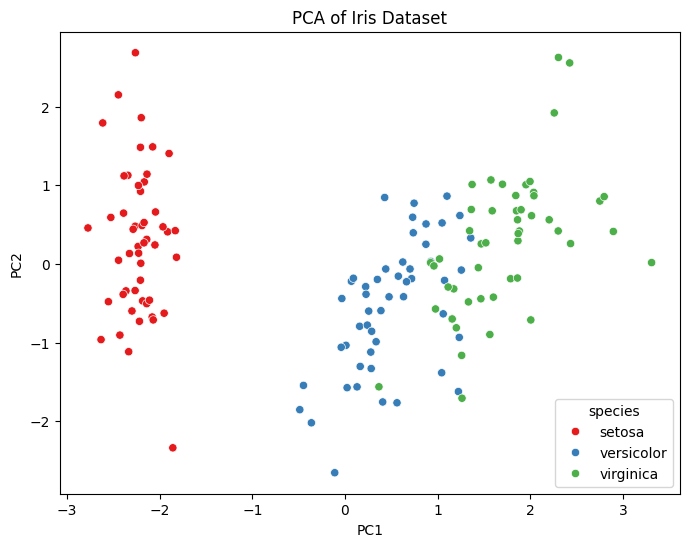

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

columns = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"]
df = pd.read_csv("/content/iris.csv")

# Encode the species column numerically
df['species_encoded'] = pd.factorize(df['species'])[0]

# Exclude the 'species' and 'species_encoded' columns from the PCA
features = df.drop(columns=['species', 'species_encoded'])

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply PCA
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

# Create a DataFrame with the PCA components
pca_df = pd.DataFrame(data=pca_features, columns=['PC1', 'PC2'])
pca_df['species'] = df['species']

# Print the explained variance ratio to understand the amount of variance captured by each component
explained_variance = pca.explained_variance_ratio_
print(f'Explained variance ratio: {explained_variance}')

# Print the principal components (eigenvectors)
print(f'Principal components:\n{pca.components_}')

# Visualize the principal components
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='species', data=pca_df, palette='Set1')
plt.title('PCA of Iris Dataset')
plt.show()


Explained variance ratio: [0.72770452 0.23030523]
Principal components:
[[ 0.52237162 -0.26335492  0.58125401  0.56561105]
 [ 0.37231836  0.92555649  0.02109478  0.06541577]]


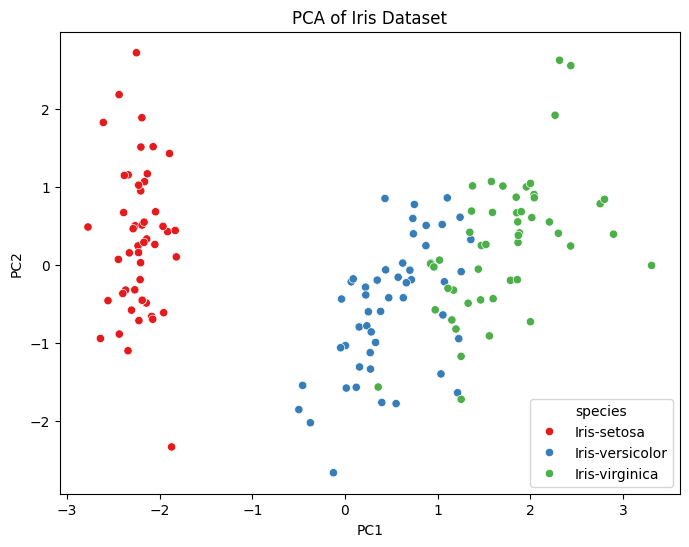

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the Iris dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
columns = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"]
df = pd.read_csv(url, header=None, names=columns)

# Encode the species column numerically
df['species_encoded'] = pd.factorize(df['species'])[0]

# Exclude the 'species' and 'species_encoded' columns from the PCA
features = df.drop(columns=['species', 'species_encoded'])

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply PCA
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

# Create a DataFrame with the PCA components
pca_df = pd.DataFrame(data=pca_features, columns=['PC1', 'PC2'])
pca_df['species'] = df['species']

# Print the explained variance ratio to understand the amount of variance captured by each component
explained_variance = pca.explained_variance_ratio_
print(f'Explained variance ratio: {explained_variance}')

# Print the principal components (eigenvectors)
print(f'Principal components:\n{pca.components_}')

# Visualize the principal components
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='species', data=pca_df, palette='Set1')
plt.title('PCA of Iris Dataset')
plt.show()
